Hello ! I am Karan and in this kernel we will explore loan approval dataset.


Problem Statement:
About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

Problem:-
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

Dataset Description:

Variable	             Description

Loan_ID:-	                  Unique Loan ID

Gender:-	                  Male/ Female

Married:-                   Applicant married (Y/N)

Dependents:-	              Number of dependents

Education:-	              Applicant Education (Graduate/ Under Graduate)

Self_Employed:-	          Self employed (Y/N)

ApplicantIncome:-	          Applicant income

CoapplicantIncome:-	      Coapplicant income

LoanAmount:-	              Loan amount in thousands

Loan_Amount_Term:-	      Term of loan in months

Credit_History:-	          credit history meets guidelines

Property_Area:-	          Urban/ Semi Urban/ Rural

Loan_Status:-	              Loan approved (Y/N)




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train_ctrUa4K.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [7]:
data.drop(columns="Loan_ID",inplace=True)

In [8]:
data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [9]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.loc[data["Credit_History"].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
42,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
117,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


In [11]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [12]:
data["Credit_History"].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [13]:
data["Gender"].fillna(data['Gender'].mode()[0],inplace=True)
data["Married"].fillna(data['Married'].mode()[0],inplace=True)
data["Dependents"].fillna(data['Dependents'].mode()[0],inplace=True)
data["Self_Employed"].fillna(data['Self_Employed'].mode()[0],inplace=True)
data["LoanAmount"].fillna(data["LoanAmount"].mean(),inplace=True)
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0],inplace=True)

**Following are the numerical columns and categorical columns accordingly**

In [14]:
Numerical_columns = data.select_dtypes(include=np.number)
categorical_columns = data.select_dtypes(exclude=np.number)

In [15]:
Numerical_columns.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0


In [16]:
categorical_columns.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


**Gender vs Loan Status.**

In [17]:
table = pd.crosstab(data.Gender,data.Loan_Status)

In [18]:
table

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


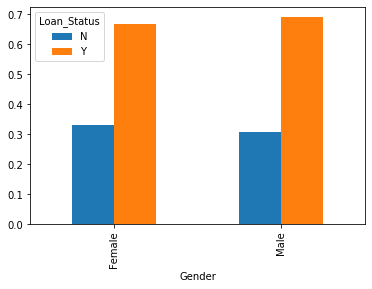

In [19]:
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar")
plt.show()

**Married vs Loan Status**

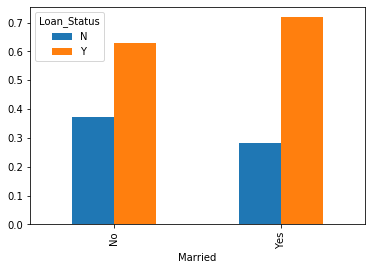

In [20]:
table2 = pd.crosstab(data.Married,data.Loan_Status)
table2.div(table2.sum(1).astype(float),axis=0).plot(kind="bar")
plt.show()

**Dependents vs Loan Status**

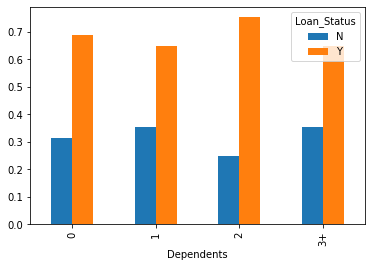

In [21]:
table2 = pd.crosstab(data.Dependents,data.Loan_Status)
table2.div(table2.sum(1).astype(float),axis=0).plot(kind="bar")
plt.show()

**Education vs Loan Status**

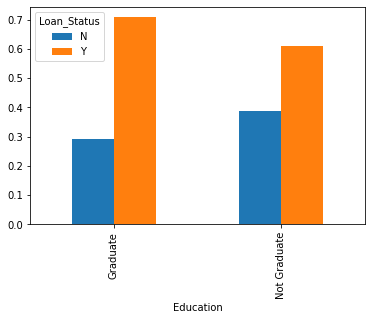

In [22]:
table2 = pd.crosstab(data.Education,data.Loan_Status)
table2.div(table2.sum(1).astype(float),axis=0).plot(kind="bar")
plt.show()

**Self_Employed vs Loan Status**

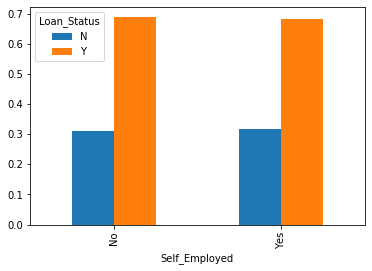

In [23]:
table2 = pd.crosstab(data.Self_Employed,data.Loan_Status)
table2.div(table2.sum(1).astype(float),axis=0).plot(kind="bar")
plt.show()

**Property_Area vs Loan Status**

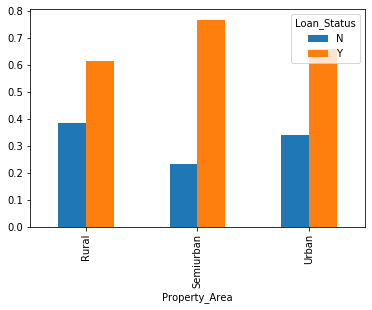

In [24]:
table2 = pd.crosstab(data.Property_Area,data.Loan_Status)
table2.div(table2.sum(1).astype(float),axis=0).plot(kind="bar")
plt.show()

In [25]:
data.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

**Replacing outliers with the maximum values**

In [26]:
applicantIncome = data['ApplicantIncome']
ApplicantIncome = applicantIncome.to_frame()

In [27]:
q1_=ApplicantIncome.quantile(0.25)
q3_=ApplicantIncome.quantile(0.75)
IQR4=q3_-q1_
lower_bound4=q1_ - 1.5 * IQR4
upper_bound4=q3_ + 1.5 * IQR4
print(lower_bound4,upper_bound4)

ApplicantIncome   -1498.75
dtype: float64 ApplicantIncome    10171.25
dtype: float64


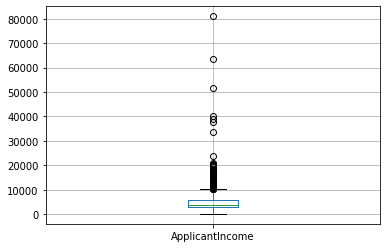

In [28]:
ApplicantIncome.boxplot()

In [29]:
ApplicantIncome.loc[ApplicantIncome["ApplicantIncome"] > 10000] = 10000

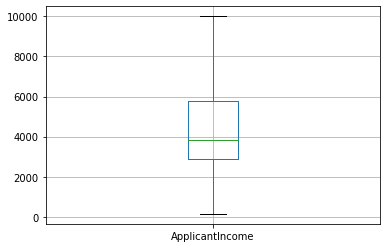

In [30]:
ApplicantIncome.boxplot()

In [31]:
data.drop(columns=["ApplicantIncome"],inplace=True)

In [32]:
data = data.join(ApplicantIncome)

In [33]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome
0,Male,No,0,Graduate,No,0.0,146.412162,360.0,1.0,Urban,Y,5849
1,Male,Yes,1,Graduate,No,1508.0,128.000000,360.0,1.0,Rural,N,4583
2,Male,Yes,0,Graduate,Yes,0.0,66.000000,360.0,1.0,Urban,Y,3000
3,Male,Yes,0,Not Graduate,No,2358.0,120.000000,360.0,1.0,Urban,Y,2583
4,Male,No,0,Graduate,No,0.0,141.000000,360.0,1.0,Urban,Y,6000


**Handling outlier's for CoapplicantIncome**

In [34]:
coapplicantIncome = data['CoapplicantIncome']
CoapplicantIncome = coapplicantIncome.to_frame()

In [35]:
Q1=CoapplicantIncome.quantile(0.25)
Q3=CoapplicantIncome.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
print(lower_bound,upper_bound)

CoapplicantIncome   -3445.875
dtype: float64 CoapplicantIncome    5743.125
dtype: float64


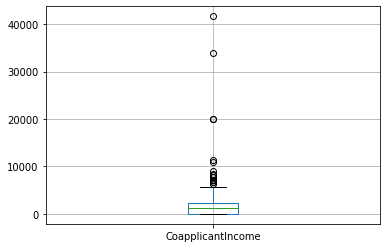

In [36]:
CoapplicantIncome.boxplot()

In [37]:
CoapplicantIncome.loc[CoapplicantIncome["CoapplicantIncome"] > 5743.125] = 5743.125

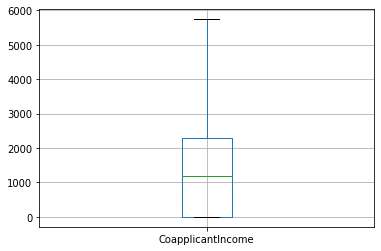

In [38]:
CoapplicantIncome.boxplot()

In [39]:
data.drop(columns=["CoapplicantIncome"],inplace=True)

In [40]:
data = data.join(CoapplicantIncome)

In [41]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849,0.0
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,4583,1508.0
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000,0.0
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,2583,2358.0
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000,0.0


In [42]:
from scipy import stats
z=np.abs(stats.zscore(data["CoapplicantIncome"]))
print(z)

[8.74587345e-01 5.43945832e-02 8.74587345e-01 5.78024981e-01
 8.74587345e-01 1.71029871e+00 5.93228693e-02 6.67966202e-01
 6.54832269e-02 2.66338304e+00 4.43362312e-01 2.58918456e-01
 2.66338304e+00 8.74954218e-01 2.05572508e-01 8.74587345e-01
 8.74587345e-01 8.74587345e-01 8.74587345e-01 1.28153782e+00
 8.74587345e-01 2.59061381e+00 3.02656995e-01 3.06353210e-01
 9.27317258e-01 8.74587345e-01 5.13341226e-01 2.33910153e-01
 8.74587345e-01 4.08615146e-01 1.20083714e+00 8.74587345e-01
 8.74587345e-01 1.52344269e-01 9.73519940e-01 3.98758574e-01
 5.52597824e-02 2.42088309e-02 2.66338304e+00 1.52960305e-01
 8.74587345e-01 1.27335966e-01 8.74587345e-01 5.64472194e-01
 8.74587345e-01 8.74587345e-01 8.74587345e-01 8.74587345e-01
 1.24457567e+00 5.26894012e-01 1.38175447e-01 8.74587345e-01
 8.74587345e-01 8.74587345e-01 8.74587345e-01 1.55673612e-01
 1.05525551e-01 4.80691330e-01 5.11493118e-01 8.86658897e-01
 1.46388441e+00 8.74587345e-01 1.25012000e+00 8.74587345e-01
 8.74587345e-01 1.956096

In [43]:
np.where(z>3)

(array([], dtype=int64),)

**So we can use 2 methods either calculate z score and than replace value by certain upper bound or lower bound if value is greater than 3 or less than -3 or we can use IQR as we did for Coapplicant column**

In [44]:
Numerical_columns.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [45]:
Loan_amount = data["LoanAmount"]

In [46]:
loanAmount = Loan_amount.to_frame()

In [47]:
q1=loanAmount.quantile(0.25)
q3=loanAmount.quantile(0.75)
IQR1=q3-q1
lower_bound1=q1 - 1.5 * IQR1
upper_bound1=q3 + 1.5 * IQR1
print(lower_bound1,upper_bound1)

LoanAmount    3.5
dtype: float64 LoanAmount    261.5
dtype: float64


In [48]:
loanAmount

,LoanAmount
0,146.412162
1,128.000000
2,66.000000
3,120.000000
4,141.000000
...,...
609,71.000000
610,40.000000
611,253.000000
612,187.000000


In [49]:
loanAmount.loc[loanAmount["LoanAmount"] > 261.5] = 261.5

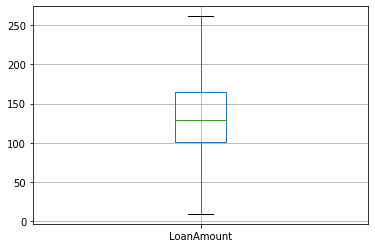

In [50]:
loanAmount.boxplot()

In [51]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849,0.0
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,4583,1508.0
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000,0.0
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,2583,2358.0
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000,0.0


In [52]:
data.drop(columns=["LoanAmount"],inplace=True)

In [53]:
loanAmount

,LoanAmount
0,146.412162
1,128.000000
2,66.000000
3,120.000000
4,141.000000
...,...
609,71.000000
610,40.000000
611,253.000000
612,187.000000


In [54]:
data = data.join(loanAmount)

In [55]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount
0,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,5849,0.0,146.412162
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,4583,1508.0,128.000000
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,3000,0.0,66.000000
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,2583,2358.0,120.000000
4,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,6000,0.0,141.000000


In [56]:
data["Loan_Amount_Term"].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [57]:
Loan_Amount_Term = data["Loan_Amount_Term"]
loan_Amount_Term = Loan_Amount_Term.to_frame()

In [58]:
q_1=loan_Amount_Term.quantile(0.25)
q_3=loan_Amount_Term.quantile(0.75)
IQR2=q_3-q_1
lower_bound2=q_1 - 1.5 * IQR2
upper_bound2=q_3 + 1.5 * IQR2
print(lower_bound2,upper_bound2)

Loan_Amount_Term    360.0
dtype: float64 Loan_Amount_Term    360.0
dtype: float64


In [59]:
loan_Amount_Term.loc[loan_Amount_Term["Loan_Amount_Term"] > 7000.0] = 360.0

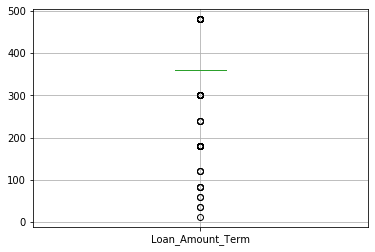

In [60]:
loan_Amount_Term.boxplot()

In [61]:
data.drop(columns=["Loan_Amount_Term"],inplace=True)

In [62]:
data = data.join(loan_Amount_Term)

In [63]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,Male,No,0,Graduate,No,1.0,Urban,Y,5849,0.0,146.412162,360.0
1,Male,Yes,1,Graduate,No,1.0,Rural,N,4583,1508.0,128.000000,360.0
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,3000,0.0,66.000000,360.0
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,2583,2358.0,120.000000,360.0
4,Male,No,0,Graduate,No,1.0,Urban,Y,6000,0.0,141.000000,360.0


In [67]:
Numerical_columns = data[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]]

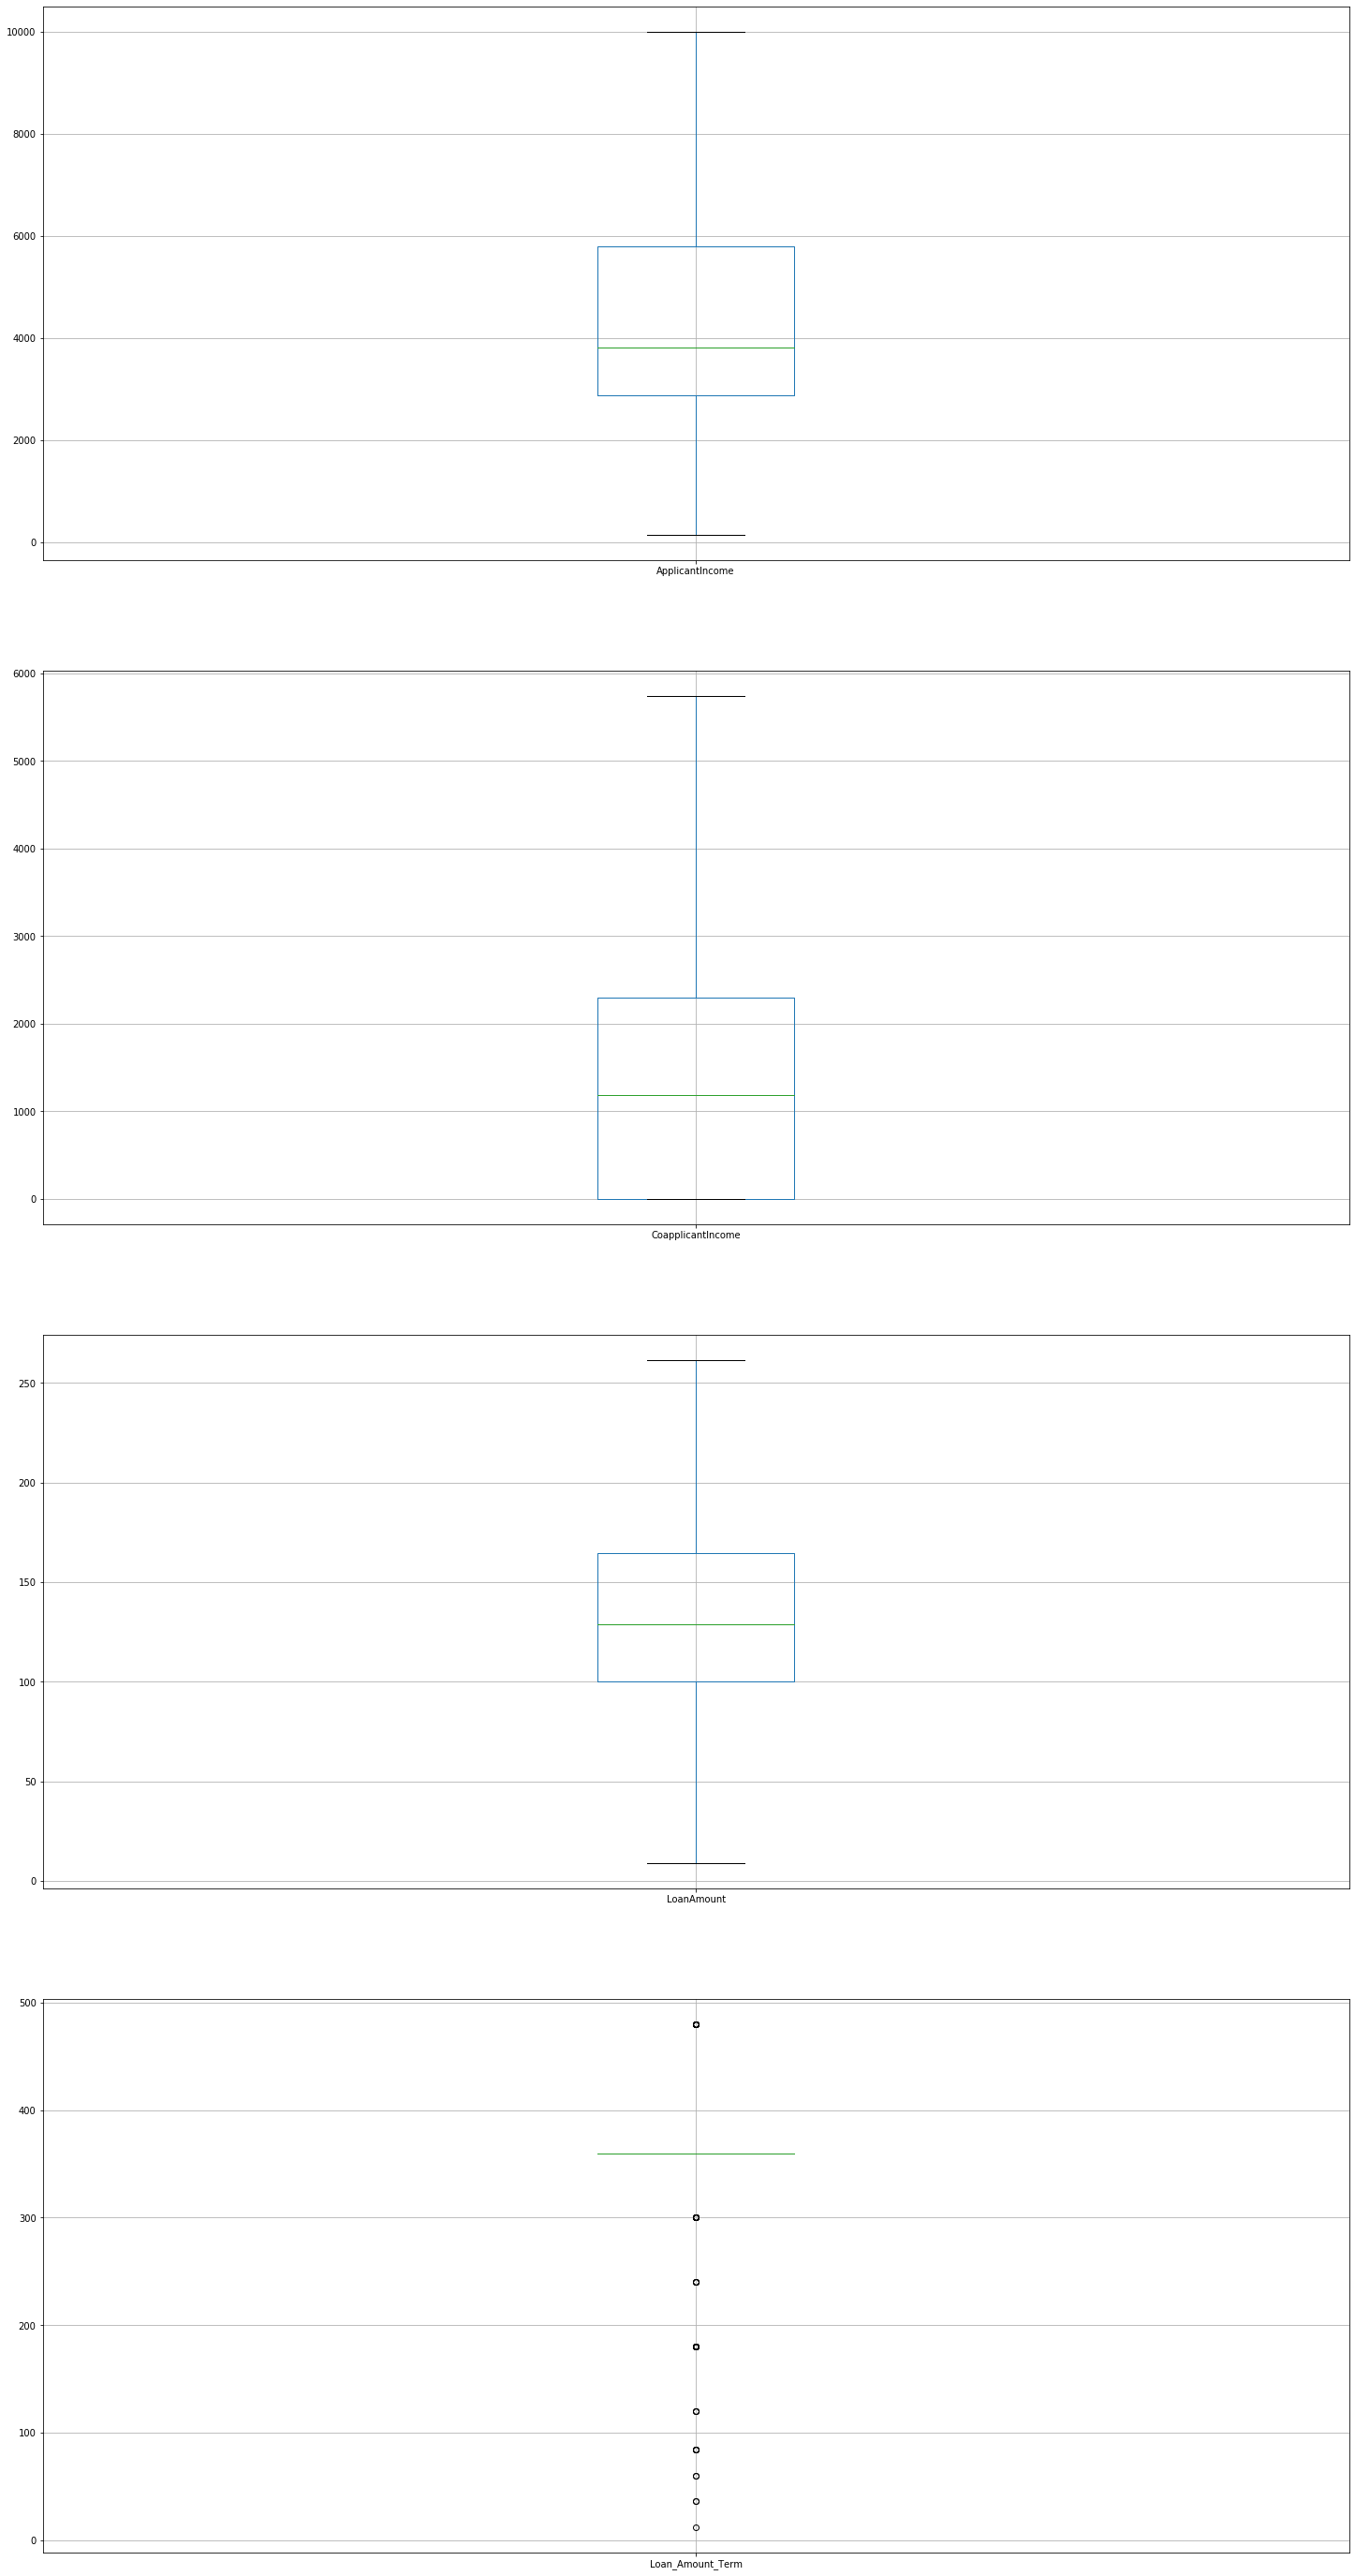

In [68]:
fig,axes = plt.subplots(4,1,figsize=(25,50))
for idx,col in enumerate(Numerical_columns):
    data.boxplot(column=col,ax=axes[idx])
plt.show()

In [69]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,Male,No,0,Graduate,No,1.0,Urban,Y,5849,0.0,146.412162,360.0
1,Male,Yes,1,Graduate,No,1.0,Rural,N,4583,1508.0,128.000000,360.0
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,3000,0.0,66.000000,360.0
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,2583,2358.0,120.000000,360.0
4,Male,No,0,Graduate,No,1.0,Urban,Y,6000,0.0,141.000000,360.0


In [70]:
X = data.loc[:, data.columns != 'Loan_Status']

In [71]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,Male,No,0,Graduate,No,1.0,Urban,5849,0.0,146.412162,360.0
1,Male,Yes,1,Graduate,No,1.0,Rural,4583,1508.0,128.000000,360.0
2,Male,Yes,0,Graduate,Yes,1.0,Urban,3000,0.0,66.000000,360.0
3,Male,Yes,0,Not Graduate,No,1.0,Urban,2583,2358.0,120.000000,360.0
4,Male,No,0,Graduate,No,1.0,Urban,6000,0.0,141.000000,360.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,2900,0.0,71.000000,360.0
610,Male,Yes,3+,Graduate,No,1.0,Rural,4106,0.0,40.000000,180.0
611,Male,Yes,1,Graduate,No,1.0,Urban,8072,240.0,253.000000,360.0
612,Male,Yes,2,Graduate,No,1.0,Urban,7583,0.0,187.000000,360.0


In [72]:
Y = data.loc[:,"Loan_Status"]

In [73]:
Y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [74]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
Y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [76]:
cat_data = X.select_dtypes(exclude=np.number)

In [77]:
cat_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural
610,Male,Yes,3+,Graduate,No,Rural
611,Male,Yes,1,Graduate,No,Urban
612,Male,Yes,2,Graduate,No,Urban


In [78]:
num_data = X.select_dtypes(include=np.number)

In [79]:
num_data

,Credit_History,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,5849,0.0,146.412162,360.0
1,1.0,4583,1508.0,128.000000,360.0
2,1.0,3000,0.0,66.000000,360.0
3,1.0,2583,2358.0,120.000000,360.0
4,1.0,6000,0.0,141.000000,360.0
...,...,...,...,...,...
609,1.0,2900,0.0,71.000000,360.0
610,1.0,4106,0.0,40.000000,180.0
611,1.0,8072,240.0,253.000000,360.0
612,1.0,7583,0.0,187.000000,360.0


In [80]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
stand_scale= StandardScaler()
X.loc[:,["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]] = stand_scale.fit_transform(X.loc[:,["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]])
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,Male,No,0,Graduate,No,1.0,Urban,0.509429,-0.874587,0.150494,0.273231
1,Male,Yes,1,Graduate,No,1.0,Rural,-0.008120,0.054395,-0.179896,0.273231
2,Male,Yes,0,Graduate,Yes,1.0,Urban,-0.655261,-0.874587,-1.292433,0.273231
3,Male,Yes,0,Not Graduate,No,1.0,Urban,-0.825733,0.578025,-0.323449,0.273231
4,Male,No,0,Graduate,No,1.0,Urban,0.571159,-0.874587,0.053377,0.273231


In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X["Dependents"] = le.fit_transform(X["Dependents"])
X["Dependents"].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [83]:
X["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [86]:
X = pd.get_dummies(data=X,columns=["Gender","Married","Education","Self_Employed","Credit_History","Property_Area"],drop_first=True)

In [87]:
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,0,0.509429,-0.874587,0.150494,0.273231,1,0,0,0,1,0,1
1,1,-0.008120,0.054395,-0.179896,0.273231,1,1,0,0,1,0,0
2,0,-0.655261,-0.874587,-1.292433,0.273231,1,1,0,1,1,0,1
3,0,-0.825733,0.578025,-0.323449,0.273231,1,1,1,0,1,0,1
4,0,0.571159,-0.874587,0.053377,0.273231,1,0,0,0,1,0,1


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test = tts(X,Y,test_size=0.3,random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (429, 12) (429,)
Test set: (185, 12) (185,)


In [91]:
LogisticRegressor = LogisticRegression()
pipeline = Pipeline(steps=[('add_poly_features', PolynomialFeatures()),
                           ('logistic_regression', LogisticRegressor)])

In [93]:
# Fit & Predict the model
pipeline.fit(X_train, Y_train)
Y_pred = pipeline.predict(X_test)
print (accuracy_score(Y_test, Y_pred))

0.7783783783783784


In [96]:
data["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix
# LR = LogisticRegression(C=0.01)
# LR.fit(X_train,Y_train)

# print(LR.coef_)
# print(LR.intercept_)

# Y_pred = LR.predict(X_test)
# Y_pred
# confusion_matrix(Y_test, Y_pred)
# from sklearn import metrics
# print('The accuracy of the Logistic Regression is',metrics.accuracy_score(Y_test,Y_pred))